# 第7章 確率的トレンドとは何か？
## 7.4 ランダムウォークの判定

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas_datareader.data as web
import numpy as np
end='2016/9/30'
lnn225 = np.log(web.DataReader("NIKKEI225", 'fred',"1949/5/16",end)).dropna()

In [46]:
print(sm.tsa.adfuller(lnn225.NIKKEI225,regression='nc')[0])#検定統計量
print(sm.tsa.adfuller(lnn225.NIKKEI225,regression='nc')[1])#p-値
print(sm.tsa.adfuller(lnn225.NIKKEI225,regression='nc')[2])#ラグの数
print(sm.tsa.adfuller(lnn225.NIKKEI225,regression='nc')[3])#データの数
print(sm.tsa.adfuller(lnn225.NIKKEI225,regression='nc')[4])#臨界値

2.17369686757
0.994169731135
38
16730
{'10%': -1.6168041340187047, '5%': -1.9410160670068219, '1%': -2.5658736531258919}


In [47]:
print(sm.tsa.adfuller(lnn225.NIKKEI225,regression='ct')[1])

0.845163622068


In [48]:
print(sm.tsa.adfuller(lnn225.NIKKEI225,regression='c')[1])

0.0888254028253


In [49]:
print(sm.tsa.adfuller(lnn225.NIKKEI225,regression='c')[3])

16730


In [50]:
print(sm.tsa.adfuller(lnn225.NIKKEI225,regression='c')[4])

{'10%': -2.5668619646086057, '5%': -2.861712776642042, '1%': -3.4307409326737046}


In [51]:
print(sm.tsa.adfuller(lnn225.NIKKEI225,regression='c')[:2])

(-2.6205426848019626, 0.088825402825322808)


In [52]:
print(sm.tsa.adfuller(lnn225.NIKKEI225,regression='nc')[1])

0.994169731135


In [53]:
print(sm.tsa.adfuller(lnn225.NIKKEI225.loc[:'1954/11/30'],regression='ct')[1])

0.50433866797


In [54]:
print(sm.tsa.adfuller(lnn225.NIKKEI225.loc[:'1954/11/30'],regression='c')[1])

0.903086924527


In [55]:
print(sm.tsa.adfuller(lnn225.NIKKEI225.loc[:'1954/11/30'],regression='nc')[1])

0.895822001571


In [56]:
print(sm.tsa.adfuller(lnn225.NIKKEI225.loc['1954/12/1':'1971/12/31'],regression='ct')[1])

0.615588208256


In [57]:
print(sm.tsa.adfuller(lnn225.NIKKEI225.loc['1954/12/1':'1971/12/31'],regression='c')[1])

0.480043863331


In [58]:
print(sm.tsa.adfuller(lnn225.NIKKEI225.loc['1954/12/1':'1971/12/31'],regression='nc')[1])

0.999689754599


In [59]:
print(sm.tsa.adfuller(lnn225.NIKKEI225.loc['1972/1/1':'1986/11/30'],regression='ct')[1])

0.840240937289


In [60]:
print(sm.tsa.adfuller(lnn225.NIKKEI225.loc['1972/1/1':'1986/11/30'],regression='c')[1])

0.96175537736


In [61]:
print(sm.tsa.adfuller(lnn225.NIKKEI225.loc['1972/1/1':'1986/11/30'],regression='nc')[1])

0.999996991887


In [62]:
print(sm.tsa.adfuller(lnn225.NIKKEI225.loc['1986/12/1':'1989/12/31'],regression='ct')[1])

0.312378263485


In [63]:
print(sm.tsa.adfuller(lnn225.NIKKEI225.loc['1986/12/1':'1989/12/31'],regression='c')[1])

0.768377939279


In [64]:
print(sm.tsa.adfuller(lnn225.NIKKEI225.loc['1986/12/1':'1989/12/31'],regression='nc')[1])

0.999525130045


In [65]:
print(sm.tsa.adfuller(lnn225.NIKKEI225.loc['1986/12/1':'1993/10/30'],regression='ct')[1])

0.408168347819


In [66]:
print(sm.tsa.adfuller(lnn225.NIKKEI225.loc['1986/12/1':'1993/10/30'],regression='c')[1])

0.614194333311


In [67]:
print(sm.tsa.adfuller(lnn225.NIKKEI225.loc['1986/12/1':'1993/10/30'],regression='nc')[1])

0.71409077222


In [68]:
print(sm.tsa.adfuller(lnn225.NIKKEI225.loc[:'1993/10/30'],regression='ct')[1])

0.620086823255


In [69]:
print(sm.tsa.adfuller(lnn225.NIKKEI225.loc[:'1993/10/30'],regression='c')[1])

0.652008364051


In [70]:
print(sm.tsa.adfuller(lnn225.NIKKEI225.loc[:'1993/10/30'],regression='nc')[1])

0.999821116797


In [71]:
print(sm.tsa.adfuller(lnn225.NIKKEI225.loc['1993/10/30':],regression='ct')[1])

0.735623826065


In [72]:
print(sm.tsa.adfuller(lnn225.NIKKEI225.loc['1993/10/30':],regression='c')[1])

0.326699911361


In [73]:
print(sm.tsa.adfuller(lnn225.NIKKEI225.loc['1993/10/30':],regression='nc')[1])

0.621967231499


In [74]:
print(sm.tsa.adfuller(lnn225.NIKKEI225.loc['1990/1/1':'1992/8/31'],regression='nc')[1])

0.0739555163473


In [75]:
print(sm.tsa.adfuller(lnn225.NIKKEI225.loc['1990/1/1':'1992/8/31'],regression='c')[1])

0.442806176355


In [76]:
print(sm.tsa.adfuller(lnn225.NIKKEI225.loc['1990/1/1':'1992/8/31'],regression='ct')[1])

0.323414633113


In [77]:
z=lnn225
y=z.diff().dropna()
x=z.shift(1).dropna()
model=sm.OLS(y,x)
results=model.fit()
print("without drift  ",results.params[0])
x=sm.add_constant(x)
model=sm.OLS(y,x)
results=model.fit()
print("with drift  ",results.params[0],results.params[1])
x["t"]=range(len(y))
model=sm.OLS(y,x)
results=model.fit()
print("with drift + time trend  ",results.params[0],results.params[1],results.params[2])

without drift   2.64035301275e-05
with drift   0.00159089854801 -0.000156562803399
with drift + time trend   0.0015504621666 -0.000149176839762 -2.60661370918e-09


In [78]:
z=lnn225.loc[:"1954/11/30"]
y=z.diff().dropna()
x=z.shift(1).dropna()
model=sm.OLS(y,x)
results=model.fit()
print("nc  ",results.params)
x=sm.add_constant(x)
model=sm.OLS(y,x)
results=model.fit()
print("c  ",results.params[0],results.params[1])
x["t"]=range(len(y))
model=sm.OLS(y,x)
results=model.fit()
print("ct  ",results.params[0],results.params[1],results.params[2])

nc   NIKKEI225    0.000082
dtype: float64
c   0.00101585631908 -0.00010764780611
ct   0.015455834379 -0.00348332776496 5.00736004787e-06


In [79]:
z=lnn225.loc["1954/11/30":'1971/12/31']
y=z.diff().dropna()
x=z.shift(1).dropna()
model=sm.OLS(y,x)
results=model.fit()
print("nc  ",results.params)
x=sm.add_constant(x)
model=sm.OLS(y,x)
results=model.fit()
print("c  ",results.params[0],results.params[1])
x["t"]=range(len(y))
model=sm.OLS(y,x)
results=model.fit()
print("ct  ",results.params[0],results.params[1],results.params[2])

nc   NIKKEI225    0.000068
dtype: float64
c   0.00354522118342 -0.000434452045716
ct   0.00776380402623 -0.00113940523217 3.41862728775e-07


In [80]:
z=lnn225.loc['1971/12/31':'1986/11/30']
y=z.diff().dropna()
x=z.shift(1).dropna()
model=sm.OLS(y,x)
results=model.fit()
print("nc  ",results.params)
x=sm.add_constant(x)
model=sm.OLS(y,x)
results=model.fit()
print("c  ",results.params[0],results.params[1])
x["t"]=range(len(y))
model=sm.OLS(y,x)
results=model.fit()
print("ct  ",results.params[0],results.params[1],results.params[2])

nc   NIKKEI225    0.000057
dtype: float64
c   0.000594490997009 -1.03330061863e-05
ct   0.0126779199481 -0.00151484490346 6.08743200288e-07


In [81]:
z=lnn225.loc['1986/11/30':'1993/10/31']
y=z.diff().dropna()
x=z.shift(1).dropna()
model=sm.OLS(y,x)
results=model.fit()
print("nc  ",results.params)
x=sm.add_constant(x)
model=sm.OLS(y,x)
results=model.fit()
print("c  ",results.params[0],results.params[1])
x["t"]=range(len(y))
model=sm.OLS(y,x)
results=model.fit()
print("ct  ",results.params[0],results.params[1],results.params[2])

nc   NIKKEI225    0.000003
dtype: float64
c   0.022443821649 -0.00221648372153
ct   0.0437321302035 -0.00415890963348 -1.94402463757e-06


In [82]:
z=lnn225.loc['1986/11/30':'1989/12/31']
y=z.diff().dropna()
x=z.shift(1).dropna()
model=sm.OLS(y,x)
results=model.fit()
print("nc  ",results.params)
print("nc  ",results.aic)
print("nc  ",results.bic)
print("nc  ",results.rsquared)
print("nc  ",results.rsquared_adj)
print("nc  ",results.mse_resid)
print("nc  ",results.eigenvals)
x=sm.add_constant(x)
model=sm.OLS(y,x)
results=model.fit()
print("c  ",results.params[0],results.params[1])
print("c  ",results.aic)
print("c  ",results.bic)
print("c  ",results.rsquared)
print("c  ",results.rsquared_adj)
print("c  ",results.mse_resid)
print("c  ",results.eigenvals)
x["t"]=range(len(y))
model=sm.OLS(y,x)
results=model.fit()
print("ct  ",results.params[0],results.params[1],results.params[2])
print("ct  ",results.aic)
print("ct  ",results.bic)
print("ct  ",results.rsquared)
print("ct  ",results.rsquared_adj)
print("ct  ",results.mse_resid)
print("ct  ",results.eigenvals)


nc   NIKKEI225    0.000096
dtype: float64
nc   -4690.71922738
nc   -4686.08065959
nc   0.00754526995726
nc   0.0062445429192
nc   0.000126045202902
nc   [ 79769.67617582]
c   0.0273577963315 -0.00258119955419
c   -4690.19492165
c   -4680.91778607
c   0.00179377601062
c   0.000483794089371
c   0.000125967071361
c   [  8.05334306e+04   2.45603153e-01]
ct   0.227868128943 -0.0228692184611 1.77248395794e-05
ct   -4696.34982225
ct   -4682.43411889
ct   0.0123919203254
ct   0.00979636689658
ct   0.000124793426035
ct   [  1.48417739e+08   1.89889943e+04   2.27656103e-02]


In [83]:
z=lnn225.loc['1993/10/31':]
y=z.diff().dropna()
x=z.shift(1).dropna()
model=sm.OLS(y,x)
results=model.fit()
print("nc  ",results.params)
x=sm.add_constant(x)
model=sm.OLS(y,x)
results=model.fit()
print("c  ",results.params[0],results.params[1])
x["t"]=range(len(y))
model=sm.OLS(y,x)
results=model.fit()
print("ct  ",results.params[0],results.params[1],results.params[2])

nc   NIKKEI225   -0.000004
dtype: float64
c   0.01438084477 -0.00151219089951
ct   0.014378777831 -0.00151200061398 9.0106281949e-11


In [84]:
z=lnn225.loc['1990/1/1':'1992/8/31']
y=z.diff().dropna()
x=z.shift(1).dropna()
model=sm.OLS(y,x)
results=model.fit()
print("nc  ",results.params)
x=sm.add_constant(x)
model=sm.OLS(y,x)
results=model.fit()
print("c  ",results.params[0],results.params[1])
x["t"]=range(len(y))
model=sm.OLS(y,x)
results=model.fit()
print("ct  ",results.params[0],results.params[1],results.params[2])

nc   NIKKEI225   -0.000118
dtype: float64
c   0.0559706709658 -0.00566027578103
ct   0.207015979612 -0.0200296525262 -1.83524258751e-05


## 7.5 確定的トレンドと確率的トレンド

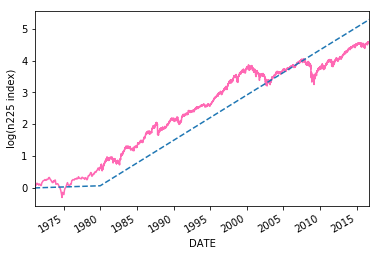

In [85]:
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas_datareader.data as pdr
import numpy as np
end='2016/9/30'
lnw5000 = np.log(web.DataReader("WILL5000INDFC", 'fred',"1949/5/16",end)).dropna()
lnw5000.columns=['Close']
plt.plot(lnw5000.Close,color='hotpink')
lnw5000["t"]=range(len(lnw5000))
model=sm.OLS(lnw5000.Close,lnw5000.t)
results=model.fit()
results.fittedvalues.plot(label='prediction',style='--')
plt.ylabel('log(n225 index)')

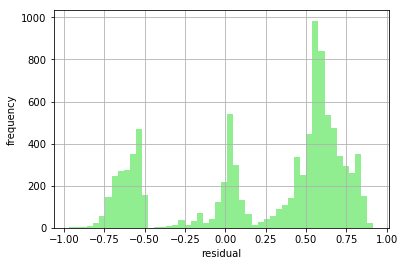

In [86]:
results.resid.hist(bins=50,color='lightgreen')
plt.ylabel('frequency')
plt.xlabel('residual')

In [87]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                 2.770e+05
Date:                Sun, 02 Jul 2017   Prob (F-statistic):               0.00
Time:                        23:03:00   Log-Likelihood:                -7929.6
No. Observations:                9397   AIC:                         1.586e+04
Df Residuals:                    9396   BIC:                         1.587e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
t              0.0006   1.07e-06    526.352      0.0